In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

from keras_pandas.Automater import Automater
import pandas as pd
import keras
import numpy as np

/Users/batuhanyardim/.pyenv/versions/3.6.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/batuhanyardim/.pyenv/versions/3.6.1/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Load dataset

In [6]:
train = np.load('./datasets/train_uk.npz')
X_train = train['X']
y_train = train['y']

test = np.load('./datasets/test_uk.npz')
X_test = test['X']
y_test = test['y']

## Keras model

In [72]:
input_dim = X_train.shape[1]

reg = 1e-3

model = keras.Sequential()
model.add(keras.layers.Dense(units=90, activation='tanh', input_dim=input_dim,
                             kernel_regularizer=keras.regularizers.l2(reg),
                             kernel_initializer=keras.initializers.glorot_normal(seed=None)))
model.add(keras.layers.Dense(units=1, activation='sigmoid',
                             kernel_regularizer=keras.regularizers.l2(reg),
                            kernel_initializer=keras.initializers.glorot_normal(seed=None)))

model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'],
              optimizer=keras.optimizers.SGD(lr=2e-5, momentum=0.9, nesterov=True))

In [73]:
model.fit(X_train, y_train, validation_split=0.1,
          batch_size=600, nb_epoch=50, verbose=1)

/Users/batuhanyardim/.pyenv/versions/3.6.1/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 205438 samples, validate on 22827 samples
Epoch 1/50
205438/205438 [==============================] - 2s 11us/step - loss: 0.4967 - acc: 0.8494 - val_loss: 0.4857 - val_acc: 0.8522
Epoch 2/50
205438/205438 [==============================] - 2s 8us/step - loss: 0.4895 - acc: 0.8494 - val_loss: 0.4840 - val_acc: 0.8522
Epoch 3/50
205438/205438 [==============================] - 1s 7us/step - loss: 0.4882 - acc: 0.8494 - val_loss: 0.4829 - val_acc: 0.8522
Epoch 4/50
205438/205438 [==============================] - 1s 7us/step - loss: 0.4874 - acc: 0.8494 - val_loss: 0.4823 - val_acc: 0.8522
Epoch 5/50
205438/205438 [==============================] - 2s 8us/step - loss: 0.4868 - acc: 0.8494 - val_loss: 0.4818 - val_acc: 0.8522
Epoch 6/50
205438/205438 [==============================] - 2s 8us/step - loss: 0.4864 - acc: 0.8494 - val_loss: 0.4815 - val_acc: 0.8522
Epoch 7/50
205438/205438 [==============================] - 2s 9us/step - loss: 0.4861 - acc: 0.8494 - val_loss: 0.4812 

## Model variability

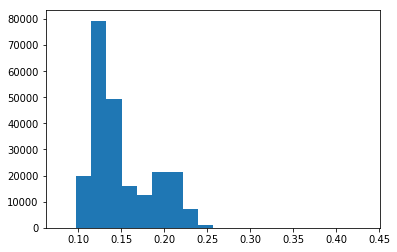

In [74]:
y_pred = model.predict_proba(X_train)

plt.hist(y_pred, bins=20);

## Some other hyperparams

In [88]:
input_dim = X_train.shape[1]

reg = 2e-5

model = keras.Sequential()
model.add(keras.layers.Dense(units=90, activation='tanh', input_dim=input_dim,
                             kernel_regularizer=keras.regularizers.l2(reg),
                             kernel_initializer=keras.initializers.glorot_normal(seed=None)))
# model.add(keras.layers.Dense(units=90, activation='tanh',
#                              kernel_regularizer=keras.regularizers.l2(reg),
#                              kernel_initializer=keras.initializers.glorot_normal(seed=None)))
model.add(keras.layers.Dense(units=1, activation='sigmoid',
                             kernel_regularizer=keras.regularizers.l2(reg),
                            kernel_initializer=keras.initializers.glorot_normal(seed=None)))

model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'],
              optimizer=keras.optimizers.SGD(lr=1e-4, momentum=0.9, nesterov=True, decay=0.04))

model.fit(X_train, y_train, validation_split=0.1,
          batch_size=600, nb_epoch=50, verbose=1)

/Users/batuhanyardim/.pyenv/versions/3.6.1/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 205438 samples, validate on 22827 samples
Epoch 1/50
205438/205438 [==============================] - 2s 12us/step - loss: 0.4895 - acc: 0.8090 - val_loss: 0.4283 - val_acc: 0.8522
Epoch 2/50
205438/205438 [==============================] - 1s 7us/step - loss: 0.4322 - acc: 0.8494 - val_loss: 0.4267 - val_acc: 0.8522
Epoch 3/50
205438/205438 [==============================] - 1s 7us/step - loss: 0.4313 - acc: 0.8494 - val_loss: 0.4261 - val_acc: 0.8522
Epoch 4/50
205438/205438 [==============================] - 2s 7us/step - loss: 0.4309 - acc: 0.8494 - val_loss: 0.4258 - val_acc: 0.8522
Epoch 5/50
205438/205438 [==============================] - 2s 7us/step - loss: 0.4306 - acc: 0.8494 - val_loss: 0.4255 - val_acc: 0.8522
Epoch 6/50
205438/205438 [==============================] - 2s 8us/step - loss: 0.4304 - acc: 0.8494 - val_loss: 0.4253 - val_acc: 0.8522
Epoch 7/50
205438/205438 [==============================] - 2s 7us/step - loss: 0.4303 - acc: 0.8494 - val_loss: 0.4252 

In [ ]:
y_pred = model.predict_proba(X_train)

(array([5.0000e+00, 1.0800e+02, 7.5200e+02, 3.3520e+03, 8.0240e+03,
        1.0674e+04, 1.4006e+04, 2.1227e+04, 2.2737e+04, 1.8287e+04,
        1.5162e+04, 1.9140e+04, 2.2191e+04, 2.4720e+04, 2.0550e+04,
        1.1926e+04, 6.0540e+03, 3.0850e+03, 2.1630e+03, 1.2900e+03,
        1.0010e+03, 5.6400e+02, 4.7100e+02, 2.9000e+02, 1.9600e+02,
        1.1600e+02, 6.1000e+01, 3.9000e+01, 2.6000e+01, 3.0000e+01,
        5.0000e+00, 6.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.11066955, 0.11479264, 0.11891574, 0.12303884, 0.12716193,
        0.13128504, 0.13540813, 0.13953124, 0.14365433, 0.14777744,
        0.15190053, 0.15602364, 0.16014673, 0.16426983, 0.16839293,
        0.17251602, 0.17663912, 0.18076222, 0.18488532, 0.18900841,
        0.19313152, 0.19725461, 0.20137772, 0.20550081, 0.20962392,
        0.21374701, 0.21787012, 0.22199321, 0.2261163 , 0.2302394 ,
        0.2343625 , 0.2384856 , 0.2426087 , 0.

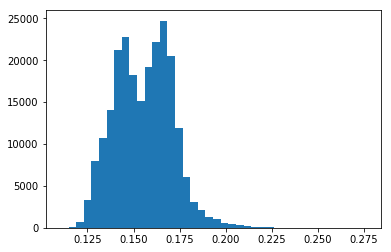

In [91]:
plt.hist(y_pred[y_pred<0.4], bins=40);

In [92]:
# Save the weights
model.save_weights('./models/weight1.h5')

# Save the model architecture
with open('./models/arch1.json', 'w') as f:
    f.write(model.to_json())